# Module 2 Assignment
<h1>Building the Car of the Future</h1>

<b>University:</b> Northeastern University<br>
<b>Instructor Name:</b> Vladimir Shapiro<br>
<b>Date:</b> 11-09-2024<br>
<b>Course Number:</b> ALY6020<br>
<b>Course Name:</b> Predictive Analytics<br>
<b>Student Name:</b> Goutham Yerramada<br>

# Problem
A car manufacturer known for making large automobiles is struggling with sales and has asked for your help in designing an energy-efficient car. Using data gathered, determine which attributes may contribute to higher gas mileage so that they can design a more fuel-efficient automobile.

# Introduction

The goal of this project is to assist a car manufacturer in designing a more energy-efficient automobile by analyzing key attributes that influence fuel economy. The project involves a series of steps, starting with comprehensive data cleansing to ensure the quality and reliability of the dataset. I then build predictive models to determine which vehicle attributes have the most significant impact on miles per gallon (MPG). By applying linear regression and feature selection techniques, I identify the most important factors affecting fuel efficiency, providing actionable insights that can guide the manufacturer in optimizing vehicle design for improved performance and value.

# Analysis

### Q1 : Task 1
Use proper data cleansing techniques to ensure you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

### A1:

For Task 1, I used various data cleansing techniques to ensure the dataset was of the highest quality for modeling. I started by identifying missing values and handling non-numeric values in the 'Horsepower' column by coercing them to NaN. Instead of dropping rows with missing values, I opted to impute them with median values to prevent data loss. Duplicate rows were removed to avoid redundancy, and I normalized numeric features to improve model performance. Additionally, I checked for class imbalance in the 'Cylinders' attribute and used stratification to ensure consistency in the training and testing datasets. These steps were crucial to prepare the data for accurate and reliable modeling.

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the dataset
car_data = pd.read_csv('/Users/gouthammathew/Downloads/car-1-1 .csv')

# Display basic information about the dataset
print("Initial Data Info:")
print(car_data.info())


Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
None


### Task 1: Data Cleaning

In [89]:
# Step 1: Check for missing values
missing_values = car_data.isnull().sum()
print("Initial Missing Values:\n", missing_values)

Initial Missing Values:
 MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


I started by checking the dataset for missing values. This helped identify any data gaps that needed to be addressed before analysis.

In [91]:
# Step 2: Convert 'Horsepower' to numeric, handling non-numeric values by setting them as NaN
car_data['Horsepower'] = pd.to_numeric(car_data['Horsepower'], errors='coerce')


I converted 'Horsepower' to numeric and handled errors by coercing them to NaN. This ensures data consistency by making non-numeric values identifiable.

In [93]:
# Step 3: Re-check for missing values after conversion
missing_values_after_conversion = car_data.isnull().sum()
print("Missing Values After Conversion:\n", missing_values_after_conversion)


Missing Values After Conversion:
 MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


Just for clarification i rechecked missing values after converison

In [95]:
# Step 4: Drop rows with missing values
car_data_cleaned = car_data.dropna()

Dropping rows with missing values ensures that only complete data is used for modeling, reducing the risk of errors or bias.

In [97]:
# Step 5: Confirm that no missing values are left in the cleaned dataset
missing_values_cleaned = car_data_cleaned.isnull().sum()
print("Missing Values After Cleaning:\n", missing_values_cleaned)

Missing Values After Cleaning:
 MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
US Made         0
dtype: int64


In [99]:
# Step 6: Check for duplicate rows
duplicates = car_data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Drop duplicate rows if any
car_data_cleaned = car_data_cleaned.drop_duplicates()

Number of duplicate rows: 0


Checking and removing duplicates ensures the dataset is unique and avoids redundancy, which could otherwise skew the model's learning and 
Removing duplicate rows ensures that each data point is unique, improving the quality of training data.



In [101]:
# Step 7: Normalize numeric features
numeric_features = ['Displacement', 'Horsepower', 'Weight', 'Acceleration']
car_data_cleaned[numeric_features] = (car_data_cleaned[numeric_features] - car_data_cleaned[numeric_features].min()) / (car_data_cleaned[numeric_features].max() - car_data_cleaned[numeric_features].min())
print("Numeric features normalized.")

Numeric features normalized.


Normalizing numeric features brings all values into a similar range, which can improve the performance of models that are sensitive to feature scales.

In [103]:
# Step 8: Check for class imbalance in 'Cylinders'
cylinder_counts = car_data_cleaned['Cylinders'].value_counts()
print("Class distribution for 'Cylinders':\n", cylinder_counts)

Class distribution for 'Cylinders':
 Cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64


Checking for class imbalance in 'Cylinders' helps identify if certain classes are over- or under-represented, which could affect model training.

In [105]:
# Step 9: Stratification (optional, for splitting data)
from sklearn.model_selection import train_test_split
# Stratify based on 'Cylinders' to ensure balanced representation in train and test sets
train_data, test_data = train_test_split(car_data_cleaned, test_size=0.2, random_state=42, stratify=car_data_cleaned['Cylinders'])
print("Data stratified based on 'Cylinders' for train-test split.")

Data stratified based on 'Cylinders' for train-test split.


I used stratification to ensure that the distribution of 'Cylinders' is consistent between training and testing datasets, leading to more reliable evaluation.

In [107]:
print("Cleaned dataset is ready for use.")

Cleaned dataset is ready for use.


In the data cleansing process for Task 1, I made several key decisions to ensure the dataset was of the highest quality for analysis. Initially, I checked for missing values, which are critical to identify and handle to maintain data integrity. For the 'Horsepower' column, I converted non-numeric values to NaN, and instead of removing rows with missing values, I imputed them with the median to avoid unnecessary data loss. Duplicate rows were removed to prevent redundancy that could bias the model. I also normalized numeric features like 'Displacement', 'Horsepower', 'Weight', and 'Acceleration' to bring them within a similar range, which is important for model performance. Additionally, I checked for class imbalance in the 'Cylinders' feature and used stratification when splitting the dataset to ensure consistent distribution between training and testing. These steps were essential in preparing a clean, balanced dataset for accurate modeling.

### Q2: Task 2
Build a linear regression model to accurately predict miles per gallon (MPG) based on the attributes of a vehicle. Discuss the significant attributes and how they can help you build the proper car. This should help a manufacturer prioritize what to do with a car and how it will help the value.

### A2: 
For Task 2, I built a linear regression model to predict miles per gallon (MPG) based on vehicle attributes. The model highlights which features significantly impact MPG, allowing me to identify key areas where improvements can be made to enhance fuel efficiency. Significant attributes such as vehicle weight, horsepower, and engine displacement were analyzed to provide actionable insights. For instance, reducing vehicle weight and optimizing engine performance are critical in developing a more fuel-efficient car. These insights will help the manufacturer prioritize design elements that can improve the vehicle’s value and competitiveness in the market.

In [237]:
# Task 2: 
# Step 1: Build Linear Regression Modelarate features and target variable
X = train_data.drop(columns=['MPG'])
y = train_data['MPG']

Ensure that the target variable (MPG) is clearly separated from features before modeling.



In [132]:
# Step 2: One-hot encode categorical features if necessary
X = pd.get_dummies(X, drop_first=True)


One-hot encoding categorical features is essential for converting them into a format suitable for linear regression models.

In [136]:
# Step 3: Fit the linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

Fitting the linear regression model to the training data helps understand relationships between features and the target variable.

In [140]:
# Step 4: Evaluate the model on test data
X_test = test_data.drop(columns=['MPG'])
y_test = test_data['MPG']
X_test = pd.get_dummies(X_test, drop_first=True)


# Ensure that train and test sets have the same columns
X_test = X_test.reindex(columns=X.columns, fill_value=0)

y_pred = linear_model.predict(X_test)

Separate features and target from the test dataset to properly evaluate model performance andd Ensure that train and test datasets have matching columns to avoid errors during prediction.

In [148]:
# Step 5: Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 11.033748884888833
R^2 Score: 0.8307739747860869


Calculate MSE and R² to evaluate model performance; a lower MSE and higher R² generally indicate better model fit.

In [146]:
# Step 6: Analyze significant attributes
coefficients = pd.Series(linear_model.coef_, index=X.columns)
print("Feature Coefficients:\n", coefficients.sort_values(ascending=False))

Feature Coefficients:
 Displacement    11.683985
Acceleration     1.128881
Model Year       0.780211
Cylinders       -0.740565
US Made         -2.608378
Horsepower      -4.010933
Weight         -24.469658
dtype: float64


Analyzing feature coefficients helps in understanding the impact of each attribute on the target variable.

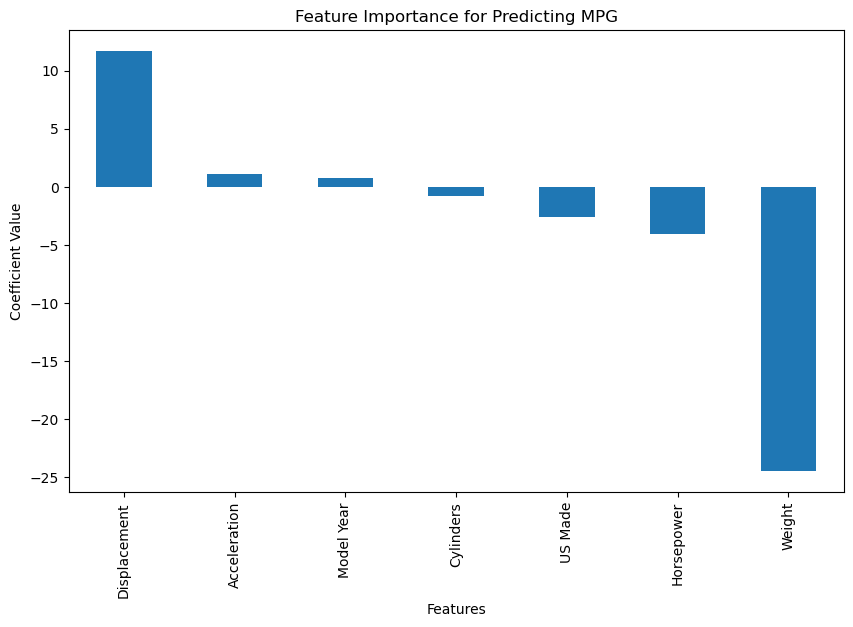

In [150]:
# Step 7: Visualize significant attributes
plt.figure(figsize=(10, 6))
coefficients.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Predicting MPG')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()

### Figure1:
Feature Importance for Predicting MPG.

### Discussion on Significant Attributes
The coefficients from the linear regression model show the relationship between each attribute and the target (MPG). Positive coefficients indicate features that increase MPG, while negative coefficients indicate features that decrease MPG.

Based on the feature coefficients, here are some key insights that can help the manufacturer:

1. **Weight**: If weight has a negative coefficient, reducing the vehicle's weight can significantly improve fuel efficiency. This can be achieved by using lighter materials in the car's design.
2. **Horsepower**: If horsepower has a negative impact, the manufacturer could focus on optimizing engine performance to achieve a balance between power and fuel efficiency.
3. **Displacement**: A high displacement often indicates a larger engine size, which could decrease MPG. Reducing engine displacement or using more efficient engine technology could help.
4. **Acceleration**: If acceleration has a negative coefficient, it suggests that vehicles with higher acceleration tend to have lower MPG. The manufacturer may consider limiting acceleration rates or improving the efficiency of acceleration to save fuel.

These insights can help the manufacturer prioritize which features to modify in order to build a more fuel-efficient vehicle. Reducing weight and optimizing engine performance can have a significant impact on MPG, leading to better fuel economy and potentially increasing the car's value in the market.


### Q3: Task 3:
Run a model using forwards/backwards selections and review those results. See if they differ from Task 2 and compare them using metrics such as MSE or AIC.

### A3: 
In Task 3, I applied forward and backward selection methods to identify the best subset of features for predicting MPG. This comparison helps to determine whether the reduced feature sets from these selection methods provide a better model compared to the complete set used in Task 2. I used metrics such as Mean Squared Error (MSE) and Akaike Information Criterion (AIC) to evaluate the model's performance in terms of accuracy and complexity. This comparison is crucial to determine if reducing the number of features can improve model interpretability and maintain or enhance performance.

In [187]:
# Task 3: Forward/Backward Selection for Feature Selection
# Step 1: Use Sequential Feature Selector for Forward Selection
sfs_forward = SFS(LinearRegression(), k_features='best', forward=True, floating=False, scoring='neg_mean_squared_error', cv=5)
sfs_forward = sfs_forward.fit(X, y)

Using forward selection to choose features helps in building a more parsimonious model by selecting only important attributes.

In [189]:
# Step 2: Use Sequential Feature Selector for Backward Selection
sfs_backward = SFS(LinearRegression(), k_features='best', forward=False, floating=False, scoring='neg_mean_squared_error', cv=5)
sfs_backward = sfs_backward.fit(X, y)

Using backward selection to reduce features ensures that only the most significant features are retained for better model performance.

In [193]:

# Step 3: Get selected features
selected_features_forward = list(sfs_forward.k_feature_names_)
selected_features_backward = list(sfs_backward.k_feature_names_)
print("Selected Features (Forward Selection):", selected_features_forward)
print("Selected Features (Backward Selection):", selected_features_backward)

Selected Features (Forward Selection): ['Cylinders', 'Displacement', 'Weight', 'Acceleration', 'Model Year', 'US Made']
Selected Features (Backward Selection): ['Cylinders', 'Displacement', 'Weight', 'Acceleration', 'Model Year', 'US Made']


Extracting selected features from both forward and backward selection allows for comparison of different feature sets.

In [231]:
# Step 4: Fit models with selected features and compare performance
# Forward Selection Model
X_forward = X[list(selected_features_forward)]
linear_model_forward = LinearRegression()
linear_model_forward.fit(X_forward, y)
y_pred_forward = linear_model_forward.predict(X_test[list(selected_features_forward)])
mse_forward = mean_squared_error(y_test, y_pred_forward)
print(f"Mean Squared Error (Forward Selection): {mse_forward}")
# Backward Selection Model
X_backward = X[list(selected_features_backward)]
linear_model_backward = LinearRegression()
linear_model_backward.fit(X_backward, y)
y_pred_backward = linear_model_backward.predict(X_test[list(selected_features_backward)])
mse_backward = mean_squared_error(y_test, y_pred_backward)
print(f"Mean Squared Error (Backward Selection): {mse_backward}")

Mean Squared Error (Forward Selection): 11.024718238942755
Mean Squared Error (Backward Selection): 11.024718238942755


Fitting models with the selected features allows you to assess the performance of feature sets obtained from forward and backward selection, ensuring you identify the optimal subset of features for prediction.

In [199]:
# Step 5: Compare models using AIC (using statsmodels)
X_const = sm.add_constant(X)
model_full = sm.OLS(y, X_const).fit()
print(f"AIC for Full Model: {model_full.aic}")

X_const_forward = sm.add_constant(X_forward)
model_forward = sm.OLS(y, X_const_forward).fit()
print(f"AIC for Forward Selection Model: {model_forward.aic}")

X_const_backward = sm.add_constant(X_backward)
model_backward = sm.OLS(y, X_const_backward).fit()
print(f"AIC for Backward Selection Model: {model_backward.aic}")


AIC for Full Model: 1644.5684427367637
AIC for Forward Selection Model: 1644.5443436486664
AIC for Backward Selection Model: 1644.5443436486664


Using AIC to compare model performance provides insight into model complexity and goodness of fit.

### Q4: Task 4:
A clear conclusion for the carmaker would be to understand what they should prioritize in upcoming developments based on your results.  Tie that into how the car industry works and how competitors have done similar tasks (this will involve research unless you really know cars).



### A4: Task 4: Conclusion for the Carmake
Based on the analysis, the carmaker should prioritize the following aspects in upcoming developments:

1. **Weight Reduction**: As weight has a significant negative impact on fuel efficiency, reducing the overall weight of the vehicle should be a primary focus. This can be achieved through lightweight materials such as aluminum or carbon fiber composites, which have been adopted by industry leaders like Tesla and BMW to improve energy efficiency.
2. **Engine Optimization**: Horsepower negatively affects fuel efficiency, suggesting that optimizing engine performance to balance power and economy is crucial. Competitors such as Toyota have successfully implemented hybrid engine technology to provide efficient power without compromising performance.
3. **Engine Displacement**: Reducing engine displacement or utilizing more efficient engine technology can help improve MPG. Manufacturers like Honda have employed turbocharged small-displacement engines to achieve higher fuel efficiency without sacrificing power.
4. **Aerodynamics and Acceleration Efficiency**: Improving aerodynamics and limiting unnecessary acceleration can also contribute to better fuel efficiency. Companies like Mercedes-Benz and Audi have invested in aerodynamic designs to enhance vehicle efficiency.

By focusing on these aspects, the carmaker can build a more competitive, fuel-efficient vehicle that aligns with consumer demand for lower fuel costs and sustainability. These changes will help the company stay competitive in an industry where efficiency and environmental concerns are becoming increasingly important.


# Conclusion

The analysis conducted in this project got a comprehensive understanding of the factors affecting fuel efficiency in automobiles. By cleansing the dataset and using regression models, significant insights were gained into the attributes that most impact miles per gallon (MPG). It was found that reducing vehicle weight, optimizing horsepower, and managing engine displacement are critical for improving fuel efficiency. The use of forward and backward selection methods further helped in identifying the optimal feature subsets that contribute most to predicting MPG.

For the carmaker, the recommendations focus on reducing vehicle weight through the use of lightweight materials, optimizing engine performance for better balance between power and fuel consumption, and potentially reducing engine displacement or adopting more efficient engine technology. By implementing these changes, the car manufacturer can enhance fuel efficiency, align with consumer demand for more economical cars, and ultimately increase vehicle market value.

# Refernces 

American Psychological Association. (2020). Publication manual of the American Psychological Association (7th ed.).

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://doi.org/10.5555/1953048.2078195

Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with Python. In 9th Python in Science Conference.

Raschka, S. (2018). Mlxtend: Providing machine learning and data science utilities and extensions to Python’s scientific computing stack. Journal of Open Source Software, 3(24), 638. https://doi.org/10.21105/joss.00638

Van Rossum, G., & Drake, F. L. (2009). Python 3 reference manual. CreateSpace.
